In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('/dfs/scratch0/vschen/metal')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def visualize_data(X, Y, C, L):
    # show data by class
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 2, 1)
    plt.title('Data by Classes')
    plt.scatter(X[Y==1,0], X[Y==1,1], label="$y=+1$", c='C1')
    plt.scatter(X[Y==-1,0], X[Y==-1,1], label="$y=-1$", c='C0')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.legend()

    # show data by slice
    plt.subplot(2, 2, 2)
    plt.title('Data by Slice')
    plt.scatter(X[C==0,0], X[C==0,1], label="$S_0$", c='C0')
    plt.scatter(X[C==1,0], X[C==1,1], label="$S_1$", c='C1')
    plt.scatter(X[C==2,0], X[C==2,1], label="$S_2$", c='C2')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.legend()

    # LFs targeting slices
    plt.subplot(2, 2, 3)
    plt.title('LFs ($\lambda_i$) Targeting Slices ($S_i$)')
    plt.scatter(X[L[:,0]==1,0], X[L[:,0]==1,1], label="$\lambda_0$", c='C0')
    plt.scatter(X[L[:,1]==1,0], X[L[:,1]==1,1], label="$\lambda_1$", c='C1')
    plt.scatter(X[L[:,2]==1,0], X[L[:,2]==1,1], label="$\lambda_2$", c='C2')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.title('$\lambda_2$ accuracy')
    plt.scatter(X[L[:,2]==1,0], X[L[:,2]==1,1], label="$\lambda_2=+1$", s=0.1, c='C1')
    plt.scatter(X[L[:,2]==-1,0], X[L[:,2]==-1,1], label="$\lambda_2=-1$", s=0.1, c='C0')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.legend()
    plt.show()


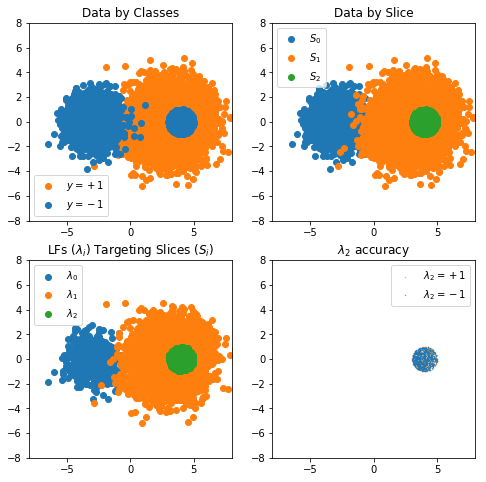

In [6]:
from simulate import data_config as config
from synthetics_utils import generate_synthetic_data
X, Y, C, L = generate_synthetic_data(config)
visualize_data(X, Y, C, L)

target op: 0.5, found op: 0.5086666666666667, found r: 1.950000000000001


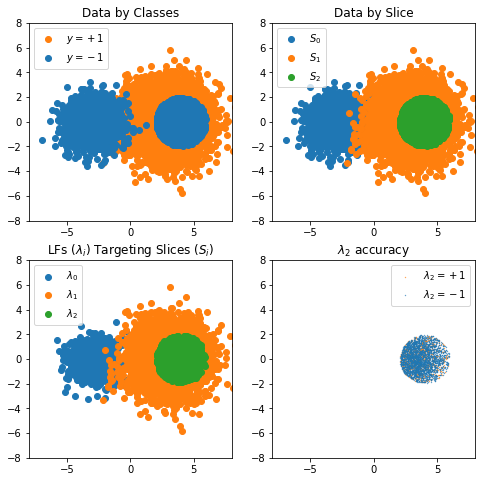

In [7]:
X, Y, C, L = generate_synthetic_data(config, 'op', 0.5)
visualize_data(X, Y, C, L)

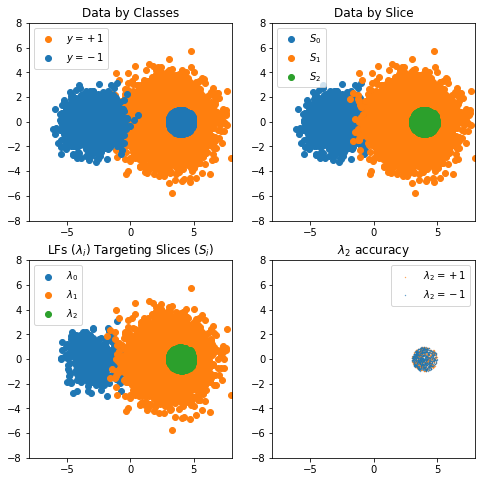

In [8]:
X, Y, C, L = generate_synthetic_data(config, 'acc', 0.5)
visualize_data(X, Y, C, L)

## Simulate

In [ ]:
%%time 
from simulate import simulate
experiment_config = {
    "num_trials": 5,
    "x_range": np.linspace(0, 1.0, 5),
    "x_var": 'op'
}
baseline_scores, manual_scores, attention_scores = \
    simulate(config, generate_synthetic_data, experiment_config)

In [ ]:
results = {
    'baseline': dict(baseline_scores),
    'manual': dict(manual_scores),
    'attention': dict(attention_scores)
}

from synthetics_utils import plot_slice_scores
plot_slice_scores(results, 'S2', xlabel='Head Acc.')
plot_slice_scores(results, 'S1', xlabel='Head Acc.')
plot_slice_scores(results, 'S0', xlabel='Head Acc.')
plot_slice_scores(results, 'overall', xlabel='Head Acc.')
plot_slice_scores(results, 'overlap', xlabel='Head Acc.')